In [1]:
import numpy as np
import skimage
from skimage.morphology import watershed, disk
from skimage.filters import threshold_otsu, try_all_threshold, rank
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.exposure import rescale_intensity

from scipy import ndimage as ndi

import matplotlib
import matplotlib.pyplot as plt

Read in test files for testing the algorithm

In [2]:
#img = rgb2gray(imread('./tests/image20190403215022.png'))
img = rgb2gray(imread('./tests/image20190905012252.png'))
matplotlib.rcParams['font.size'] = 9

First do contrast enhancement by stretching the histogram

In [3]:
p2, p98 = np.percentile(img, (2, 98))
imgo = rescale_intensity(img, in_range=(p2, p98))

Do segmentation on grayscale image and denoise it

In [5]:
gray = skimage.img_as_ubyte(skimage.color.rgb2gray(imgo))
denoised = rank.median(gray,disk(2))

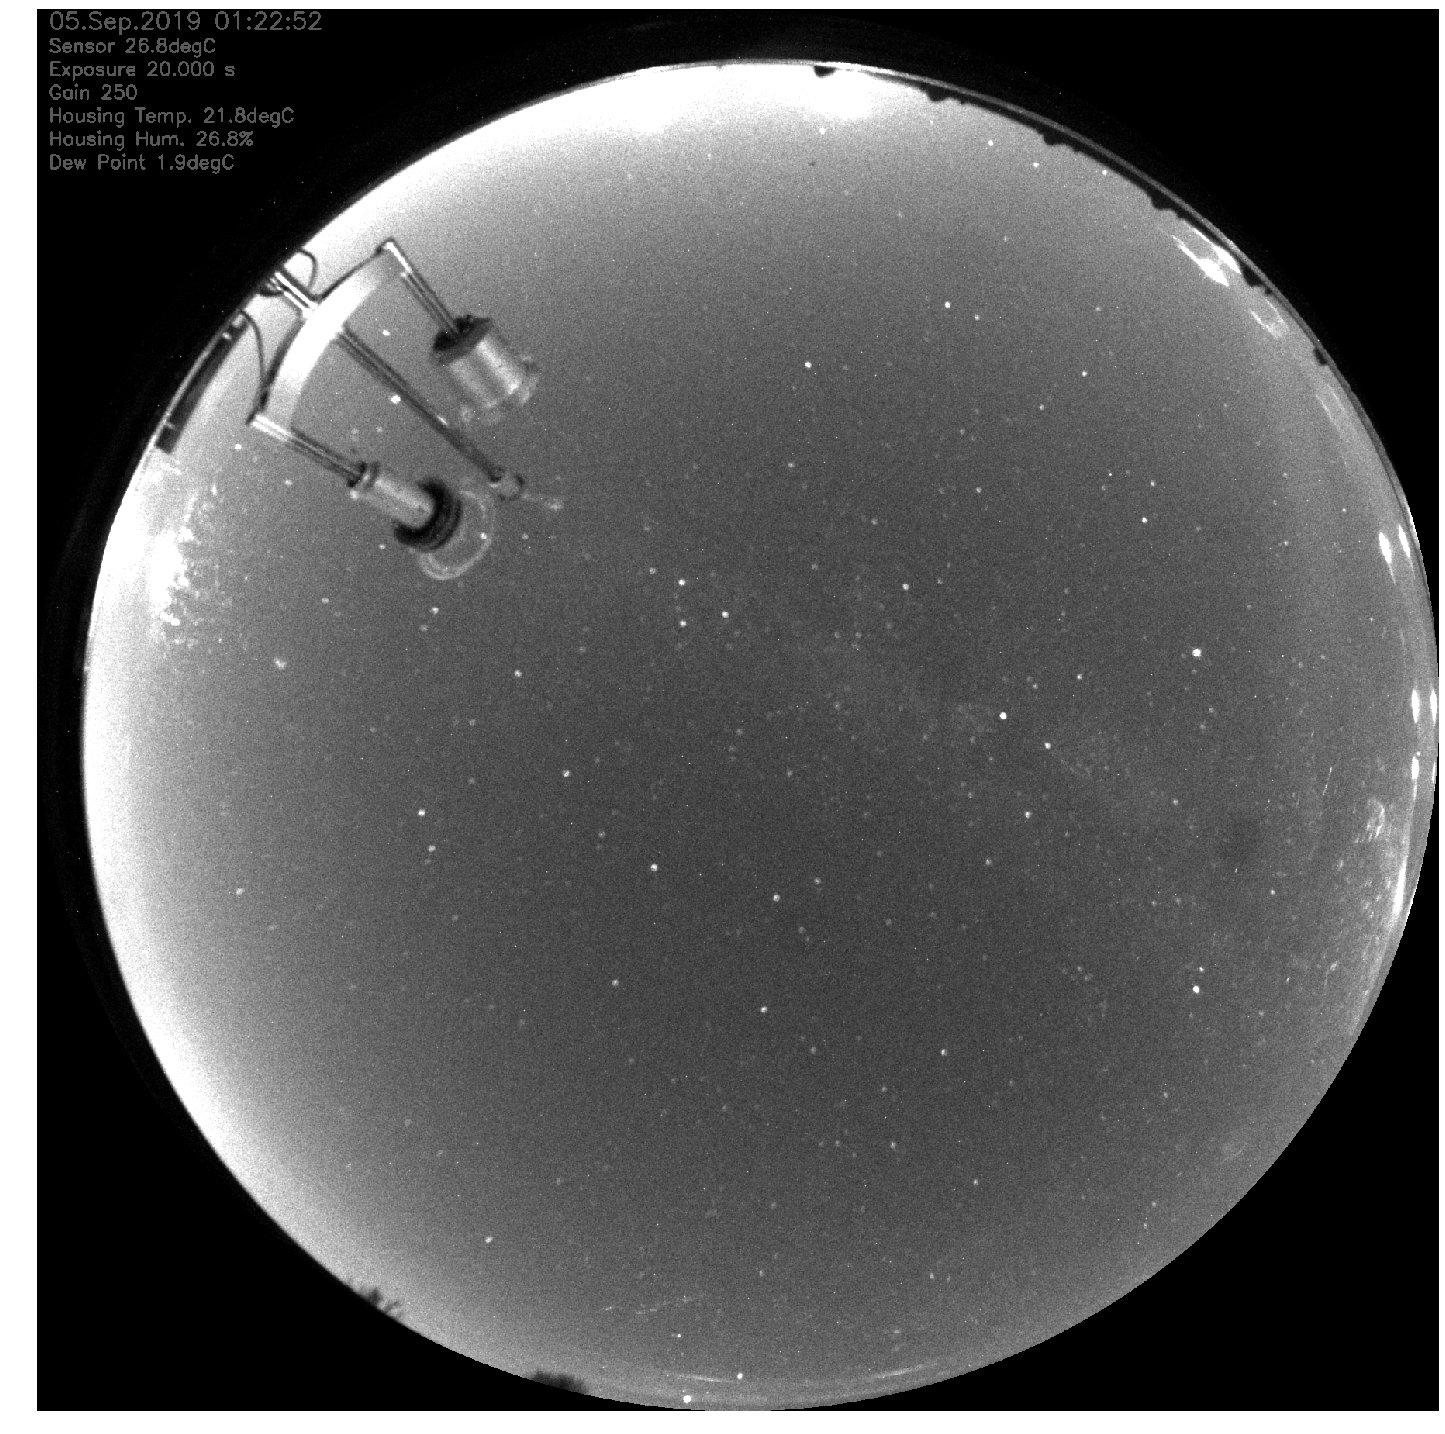

In [6]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(gray,cmap='gray')
ax.set_axis_off()
plt.tight_layout()

Plot histogram of image

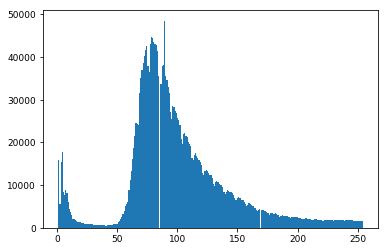

In [7]:
plt.hist(gray.ravel(),bins=256,range=(1,254));

Mark sections for watershed algorithm:
find continuous region (low gradient - where less than 10 for this image) --> markers
disk(10) is used here to get a more smooth image

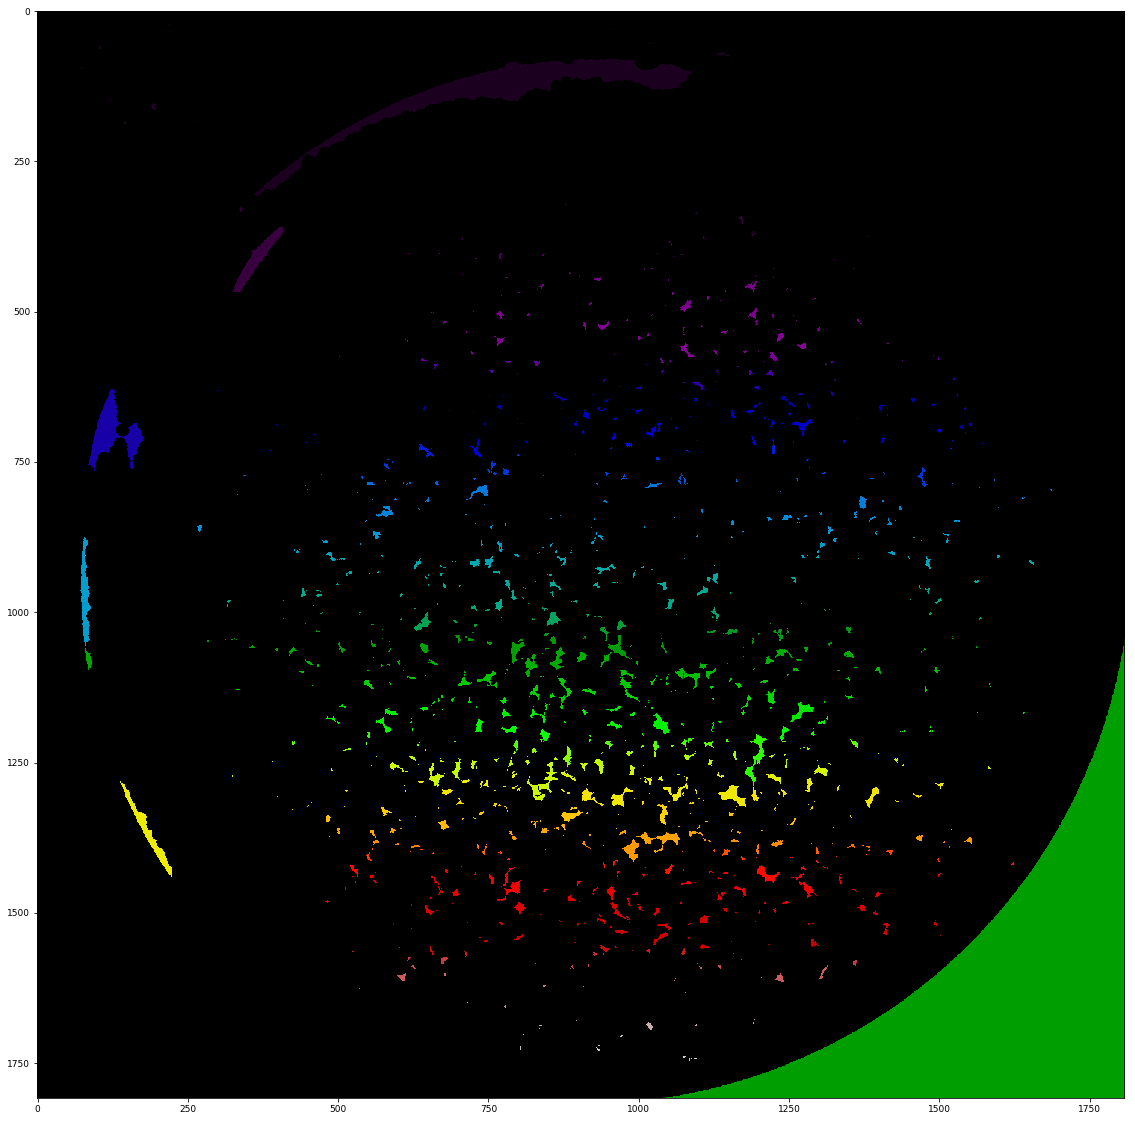

In [8]:
markers = rank.gradient(denoised, disk(10)) < 15
markers = ndi.label(markers)[0]
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')

Show elevation map of image

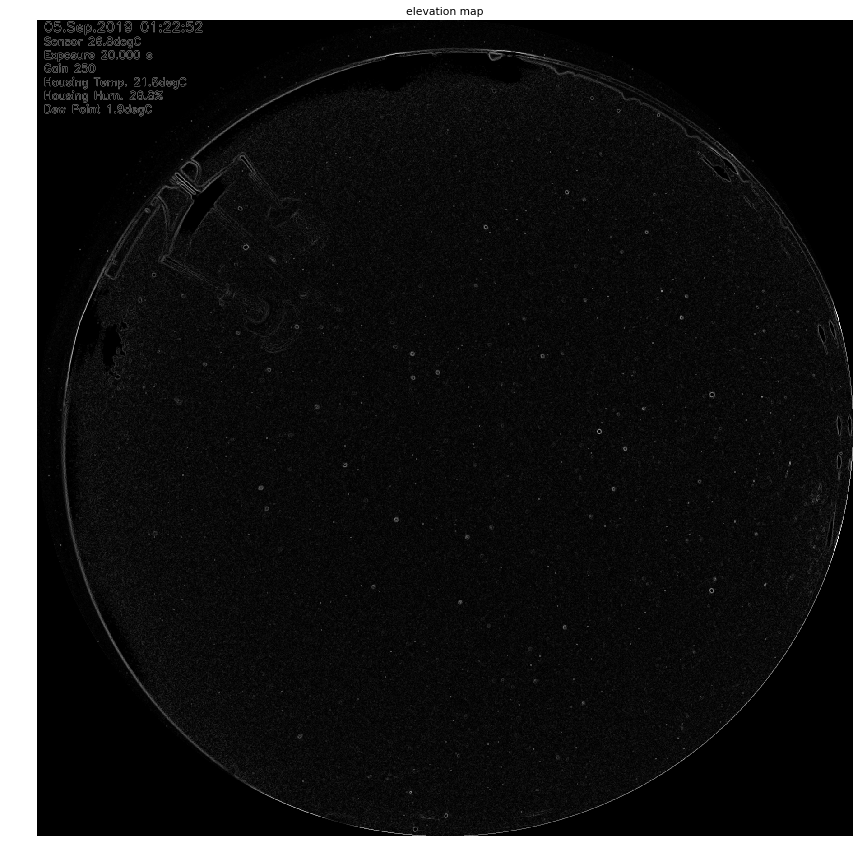

In [9]:
from skimage.filters import sobel
elevation_map = sobel(gray)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('elevation map')
ax.axis('off');

Do watershed segmentation

In [10]:
labels = watershed(elevation_map, markers)

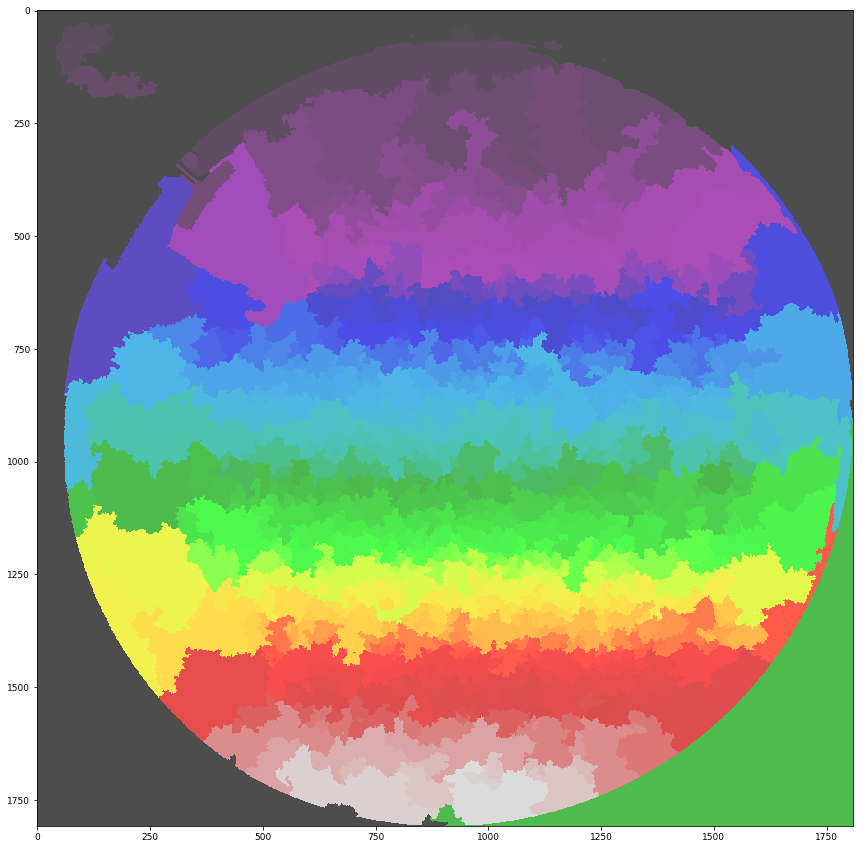

In [11]:
plt.subplots(figsize=(15, 15))
plt.imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest', alpha=.7)

/home/rainer/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


NameError: name 'try_all' is not defined

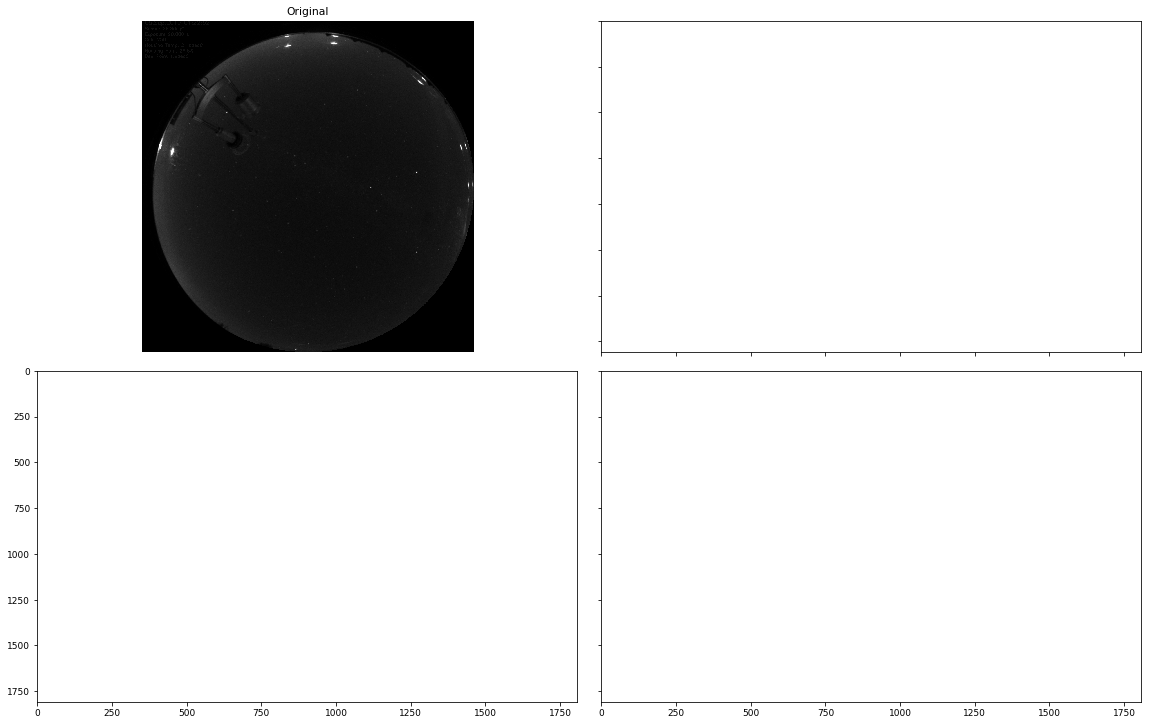

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})
ax0, ax1, ax2, ax3 = ax.ravel()
plt.tight_layout()

ax0.imshow(img, cmap=plt.cm.gray)
ax0.set_title('Original')
ax0.axis('off')

ax2.imshow(try_all, cmap=plt.cm.gray)
ax2.set_title('Original >= Local Otsu' % threshold_global_otsu)
ax2.axis('off')

ax3.imshow(global_otsu, cmap=plt.cm.gray)
ax3.set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax3.axis('off')

plt.tight_layout()
plt.show()